<a href="https://colab.research.google.com/github/soohyoen/artificial-intelligence/blob/main/ml_12_%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5_GradientBoosting_AdaBoost_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mglearn

     |████████████████████████████████| 540 kB 5.0 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=3634437444dc35c5affe240778c1eee4ced9f74223e7e0e09f1977164daf4227
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


## Boosting 

- 여러 개의 분류기가 순차적으로 학습을 수행하되, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서 올바르게 예측할 수 있도록 다음 분류기에게 가중치(weight)를 부여하면서 학습과 예측을 진행

- 분류기에 약한 학습기를 사용

- 약한 학습기 : 예측 성능이 상대적으로 떨어지는 학습 알고리즘, 결정트리가 좋은 예

# GradientBoosting 

- 여러 개의 결정 트리를 묶어 강력한 모델을 만드는 앙상블 방법

- 회귀와 분류 모두에 사용

- 랜덤 포레스트와는 달리 그래디언트 부스팅은 이전 트리의 오차를 보완하는 방식으로 순차적으로 트리를 만듬 (무작위성이 없음)

- 강력한 사전 가지치기가 사용

- 보통 다섯 개 이하 깊이의 트리를 사용하므로 메모리를 적게 사용하고 예측도 빠름

- 각각의 트리는 데이터의 일부에 대해서만 예측을 잘 수행할 수 있어서 트리가 많이 추가 될수록 성능이 좋아짐

- 랜덤 포레스트보다는 매개변수 설정에 조금 더 민감하지만 잘 조정하면 더 높은 정확도를 제공

-  learning_rate : 이전 트리의 오차를 얼마나 강하게 보정할 것인지를 제어 <br>
(가중치를 계산하는 방식에서 경사하강법를 이용하여 최적의 가중치(파라미터)를 찾아냄)

- 학습률이 크면 트리는 보정을 강하게 하기 때문에 복잡한 모델을 만듬

- n_estimators 값을 키우면 앙상블에 트리가 더 많이 추가되어 모델의 복잡도가 커지고 훈련 세트에서의 실수를 바로잡을 기회가 더 많아짐

[GradientBoostingClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)

주요 매개변수(Hyperparameter)

- n_estimators  : 생성할 트리의 개수 (트리가 많아질 수록 과대적합 가능성 증가)

- learning_rate : 오차를 보정하는 정도 (값이 높을 수록 오차를 많이 보정하려고 함 )

- max_depth : 트리의 최대 깊이 (일반적으로 트리의 깊이를 깊게 설정하지 않음)


#### GradientBoosting 실습 01

유방암 데이터 적용

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

1.0 0.965034965034965


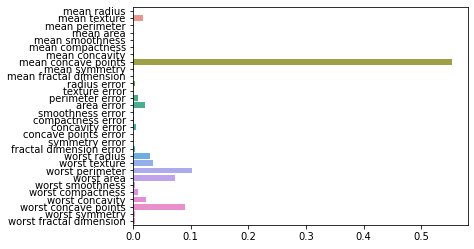

In [6]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer

# 데이터 로드
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    random_state=0)

# 모델 학습
model = GradientBoostingClassifier(random_state=0, n_estimators=100)
model.fit(X_train, y_train)

# 평가
print( model.score(X_train, y_train), model.score(X_test, y_test) )

# 특성 중요도 시각화
import seaborn as sns
sns.barplot(x=model.feature_importances_, y=cancer.feature_names)


- 과대적합을 막기 위해서 트리의 최대 깊이를 줄여 사전 가지치기를 강하게 하거나 학습률을 낮출 수 있음

0.9906103286384976 0.972027972027972


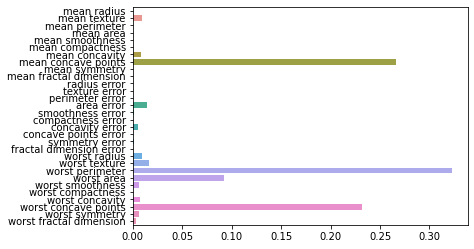

In [49]:
# 트리의 최대 깊이를 줄여 사전 가지치기를 강하게한 경우
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    random_state=0)

# 모델 학습
model = GradientBoostingClassifier(random_state=0, n_estimators=100, max_depth = 1)
model.fit(X_train, y_train)
# 평가
print( model.score(X_train, y_train), model.score(X_test, y_test) )
# 특성 중요도 시각화
import seaborn as sns
sns.barplot(x=model.feature_importances_, y=cancer.feature_names)

0.9953051643192489 0.986013986013986


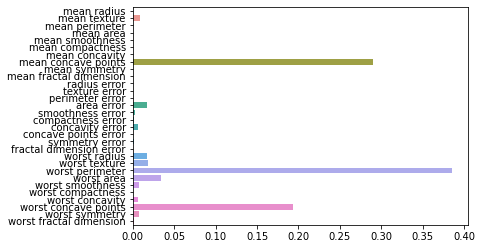

In [83]:
# 학습률을 조정한 경우
# 모델 학습
model = GradientBoostingClassifier(random_state=0, max_depth=1, learning_rate=0.2, n_estimators=100)
model.fit(X_train, y_train)
# 평가
print( model.score(X_train, y_train), model.score(X_test, y_test) )
# 특성 중요도 시각화
import seaborn as sns
sns.barplot(x=model.feature_importances_, y=cancer.feature_names)

- 두 방식은 모델의 복잡도를 감소시키므로 예상대로 훈련 세트의 정확도가 낮아짐
- 학습률을 낮추는 것은 테스트 세트의 성능을 조금밖에 개선하지 못했지만, 트리의 최대 깊이를 낮추는 것은 모델 성능 향상에 크게 기여

- 그래디언트 부스팅 트리의 특성 중요도 그래프가 랜덤 포레스트의 특성 중요도와 비슷하지만 그래디언트 부스팅은 일부 특성을 완전히 무시하고 있음

- 일반적으로 더 안정적인 랜덤 포레스트를 먼저 적용

- 예측 시간이 중요하거나 머신러닝 모델에서 마지막 성능까지 쥐어짜야 할 때 그래디언트 부스팅을 사용

- 대규모 머신러닝 문제에 그래디언트 부스팅을 적용하려면 xgboost 패키지를 사용

## 장단점

- 지도 학습에서 가장 강력하고 널리 사용하는 모델 중 하나

- 가장 큰 단점은 매개변수를 잘 조정해야 한다는 것과 훈련 시간이 길다는 것

- 다른 트리 기반 모델처럼 특성의 스케일을 조정하지 않아도 되고, 이진 특성이나 연속적인 특성에서도 잘 동작

- 트리 기반 모델의 특성상 희소한 고차원 데이터에는 잘 작동하지 않음

- 중요 매개변수 : 트리의 개수를 지정하는 <font color=yellow>n_estimators</font>, 이전 트리의 오차를 보정하는 정도를 조절하는 <font color=yellow>learning_rate</font>

- 두 매개변수는 깊게 연관되며 learning_rate를 낮추면 비슷한 복잡도의 모델을 만들기 위해서 더 많은 트리를 추가해야 함

- n_estimators가 클수록 좋은 랜덤 포레스트와는 달리 그래디언트 부스팅에서 n_estimators를 크게 하면 모델이 복잡해지고 과대적합될 가능성이 높아짐

- 일반적인 관례는 가용한 시간과 메모리 한도에서 n_estimators를 맞추고 나서 적절한 learning_rate를 찾는 것

- 중요한 또 다른 매개변수는 각 트리의 복잡도를 낮추는 <font color=yellow>max_depth</font>(또는 <font color=yellow>max_leaf_nodes</font>)

- 일반적으로 그래디언트 부스팅 모델에서는 max_depth를 매우 작게 설정하며 트리의 깊이가 5보다 깊어지지 않게함

# AdaBoost (Adaptive Boosting)

- GradientBoosting 처럼 약한 학습기를 사용
- 다른 점은 이전의 모델이 잘못 분류한 샘플에 가중치를 높여서 다음 모델을 훈련시킴 <br>
 (반복마다 샘플의 가중치를 수정, GBM은 이전 예측기가 만든 잔여 오차에 새로운 예측기를 학습)
- 훈련된 각 모델은 성능에 따라 가중치가 부여됨
- 예측을 만들 때는 모델이 예측된 레이블을 기준으로 모델의 가중치를 합산하여 가장 높은 값을 가진 레이블을 선택

- GradientBoosting와 마찬가지로 순차적으로 학습해야 하므로 n_jobs 매개변수는 지원하지 않음

[AdaBoostClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)
```
AdaBoostClassifier(base_estimator=None, *, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=None)
```
- base_estimator : 앙상블이 구축되는 기본 추정기, 기본값으로 DecisionTreeClassifier(max_depth=1)를 사용
- <font color=yellow>n_estimators : 생성할 트리의 개수</font>
- <font color=yellow>learning_rate : 학습률</font>
- algorithm : 부스팅 알고리즘, 기본값='SAMME.R'
- random_state : 난수 seed 설정


#### AdaBoost 실습 01

two_moon 데이터 셋 적용

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# 데이터 로드
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    stratify=y, 
                                                    random_state=42)

In [94]:
from sklearn.ensemble import AdaBoostClassifier

# 모델 학습
model = AdaBoostClassifier(n_estimators=5,random_state =0)
model.fit(X_train, y_train)

# 평가
model.score(X_train, y_train), model.score(X_test,y_test)

(0.9066666666666666, 0.8)

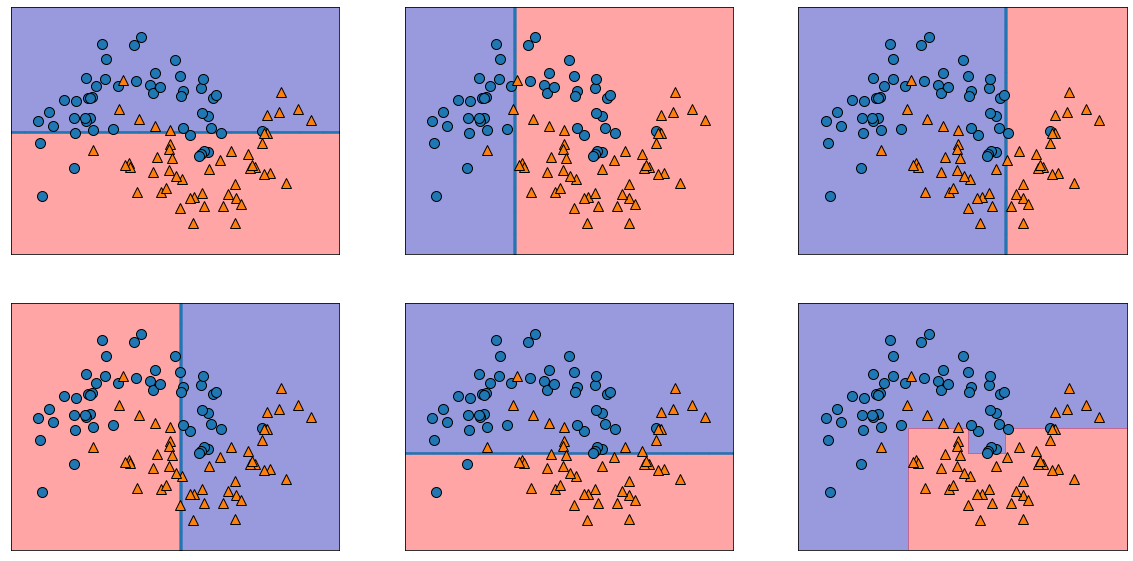

In [95]:
import mglearn

# 결정 경계 시각화
fig, axes = plt.subplots(2,3, figsize=(20,10))
for tree, ax in zip(model.estimators_, axes.ravel()):
  mglearn.plots.plot_tree_partition(X,y, tree,ax=ax)


# AdaBoost로 만들어진 결정경계
mglearn.plots.plot_2d_separator(model,X,fill=True, alpha=0.4,ax=axes[-1,-1])
mglearn.discrete_scatter(X[:,0],X[:,1],y)

- AdaBoostCalssifier는 깊이가 1인 결정트리를 사용하므로 각 트리의 결정 경계가 직선 하나 뿐임.
- 아주 얕은 트리를 앙상블

#### AdaBoost 실습 02

유방암 데이터를 이용

0.9906103286384976 0.972027972027972


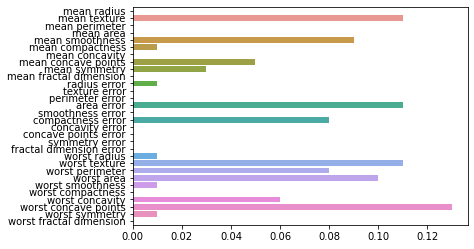

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_breast_cancer

# 데이터 로드
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    random_state=0)
from sklearn.ensemble import AdaBoostClassifier

# 모델 학습
model = AdaBoostClassifier(random_state=0, n_estimators=100, learning_rate=0.09 )
model.fit(X_train, y_train)

# 평가
print( model.score(X_train, y_train), model.score(X_test, y_test) )

# 특성 중요도 시각화
import seaborn as sns
sns.barplot(x=model.feature_importances_, y=cancer.feature_names)


# XGBoost (extreme gradient boosting)

- GBM을 개선하여 속도를 높인 것 (병렬 수행 및 다양한 기능으로)
- 일반적인 GBM에 비해 수행 시간이 빠른 것이지 다른 머신러닝 알고리즘에 비해서 빠르다는 의미는 아님 (랜덤 포레스트)
- 과적합 규제 기능 지원
- 결손값을 자체 처리할 수 있는 기능 지원

[XGBClassifier()](https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn)

주요 매개변수(Hyperparameter)

- n_estimators  : 생성할 트리의 개수, 지정된 횟수만큼 반복적으로 학습 오류를 감소시며 학습을 진행(조기중단 미지원)
- learning_rate : 오차를 보정하는 정도
- max_depth : 트리의 최대 깊이

- subsample : 데이터 샘플링 비율을 지정, 보통 0.5~1 사이의 값을 사용 <br>
 트리가 커져서 과적합되는 것을 제어하기 위함
- reg_alpha : L1 regularization 적용값
- reg_lambda : L2 regularization 적용값
- n_jobs : xgboost를 실행하는 데 사용되는 병렬 스레드 수

In [137]:
import xgboost
xgboost.__version__

'0.90'

#### XGBoost 실습 01

유방암 데이터를 이용

0.9976525821596244 0.986013986013986


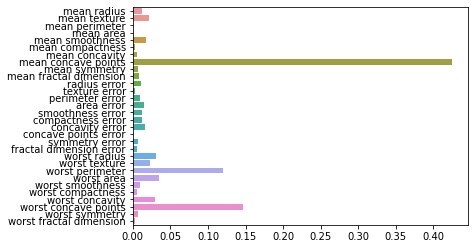

In [148]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.datasets import load_breast_cancer
import pandas as pd

# 데이터 로드
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    random_state=0)

# 모델 학습
model = XGBClassifier(random_state=0, n_estimators=400, max_depth=3, learning_rate=0.01)
model.fit(X_train, y_train)

# 평가
print( model.score(X_train, y_train), model.score(X_test, y_test) )

# 특성 중요도 시각화
import seaborn as sns
sns.barplot(x=model.feature_importances_, y=cancer.feature_names)

In [ ]:
# plot_importance() 이용
import matplotlib.pyplot as plt
from xgboost import plot_importance


In [ ]:
# 모델 학습 (조기중단을 수행)

# 평가

# 특성 중요도 시각화


- 조기 중단값을 너무 급격하게 줄이면 예측 성능이 저하될 우려가 있음

# LightGBM

- XGBoost 보다 학습에 걸리는 시간이 훨씬 적음
- 메모리 사용량도 상대적으로 적음
- XGBoost와 비교하여 예측 성능에 별다른 차이가 없음
- 적은 데이터 세트에 적용할 경우 과적합 발생이 쉬움 <br>
 (일반적으로 10,000 건 이하의 데이터 세트로 공식문서에 기술)
- 균형 트리분할(Level Wise) 방식이 아닌 리프중심 트리분할(Leaf Wise) 방식을 사용


<center>
 <img src="https://blog.kakaocdn.net/dn/UI31I/btqCpRmVipf/dZOeXysFGspk2ukY7tGJb0/img.jpg" alt="트리분할" width="60%" />

</center>

균형 트리분할(Level Wise)

- 대부분 트리 기반 알고리즘은 트리의 깊이를 효과적으로 줄이기 위한 균형 트리분할(Level Wise) 방식을 사용
- 균형 잡힌 트리는 오버피팅에 보다 더 강한 구조를 가질 수 있다고 알려져 있기 때문
- 균형을 맞추기 위한 시간이 추가로 필요

리프중심 트리분할(Leaf Wise)

- 트리의 균형을 맞추지 않고, 최대 손실 값(max delta loss)을 가지는 리프 노드를 지속적으로 분할
- 트리의 깊이가 깊어지고 비대칭적인 규칙 트리를 생성
- 학습을 반복할 수록 균형트리분할 방식보다 예측 오류 손실을 최소화 할 수 있음

[LGBMClassifier()](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html)

주요 매개변수(Hyperparameter)

- n_estimators  : 생성할 트리의 개수, 지정된 횟수만큼 반복적으로 학습 오류를 감소시며 학습을 진행(조기중단 미지원)
- learning_rate : 오차를 보정하는 정도
- max_depth : 트리의 최대 깊이

- subsample : 데이터 샘플링 비율을 지정, 보통 0.5~1 사이의 값을 사용 <br>
 트리가 커져서 과적합되는 것을 제어하기 위함
- reg_alpha : L1 regularization 적용값
- reg_lambda : L2 regularization 적용값
- n_jobs : xgboost를 실행하는 데 사용되는 병렬 스레드 수

- **num_leaves : 개별 트리가 가질 수 있는 최대 리프의 수 <br>
(높이면 정확도가 높아지지만, 반대로 트리의 깊이가 깊어지고 모델 복잡도가 증가, 과대적합 가능성 증가)**
- **min_child_samples : 결정 트리의 min_samples_leaf와 같은 파라미터**

#### LightGBM 설치하기

- 32bit python 에서는 설치되지 않음. 64bit Python 혹은 Anaconda 환경에서 설치

[Conda 이용하기](https://anaconda.org/conda-forge/lightgbm)


Anaconda Prompt (Anaconda3) 관리자 권한으로 실행
```
conda install -c conda-forge lightgbm
```

In [139]:
import lightgbm
lightgbm.__version__

'2.2.3'

#### LightGBM 실습 01

유방암 데이터를 이용

1.0 0.986013986013986


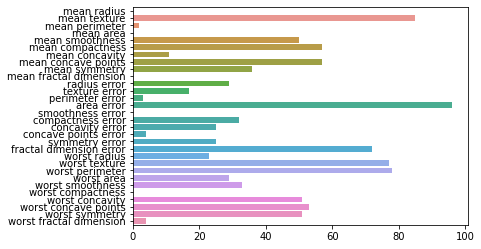

In [146]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.datasets import load_breast_cancer

# 데이터 로드
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    random_state=0)

# 모델 학습
model = LGBMClassifier(random_state=0, n_estimators=1000, max_depth=1, learning_rate=0.09)
model.fit(X_train, y_train)

# 평가
print( model.score(X_train, y_train), model.score(X_test, y_test) )

# 특성 중요도 시각화
import seaborn as sns
sns.barplot(x=model.feature_importances_, y=cancer.feature_names)

In [ ]:
# plot_importance() 이용
from lightgbm import plot_importance

#### Tip

NGBoost (Natural Gradient Boost)

- 앤드류 응 교수가 속해있는 스탠퍼드 ML Group에서 최근 발표한 부스팅 알고리즘 (2019년 10월 9일에 발표)

장단점

- NGBoost는 XGBoost나 LightBoost보다 성능이 조금 더 좋음
- 확률적인 예측을 해줌 (예측의 불확실성을 측정)

- XGBoost, LightGBM보다 컴퓨팅 시간이 오래 걸림

# 분류 머신러닝 알고리즘 정리

- 나이브 베이즈(Naive Bayes) : 베이즈(Bayes) 통계와 생성 모델에 기반

- 로지스틱 회귀(Logistic Regression) : 독립변수와 종속변수의 선형 관계성에 기반

- 결정 트리(Decision Tree) : 데이터 균일도에 따른 규칙 기반

- 서포트 벡터 머신(Suppert Vector Machine) : 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아줌

- 최소 근접(Nearest Neighbor) 알고리즘 : 근접 거리를 기준

- 앙상블(Ensemble) : 서로 다른(또는 같은) 머신러닝 알고리즘을 결합

- 신경망(Neural Network) : 심층 연결 기반